# NASDAQ Data Analysis


# 1.Load and Prepare NASDAQ Data


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, coint
import statsmodels.api as sm

# Load the data
# Assuming data has been preprocessed and saved to 'nasdaq_dataframe.pkl'
from helpermodules.df_dataretrieval import IndexData_Retrieval

filename = 'nasdaq_dataframe.pkl'
data_retriever = IndexData_Retrieval(filename=filename, link='', frequency='1day', months=12)
nasdaq_data = data_retriever.getdata()
nasdaq_data.head()


/Users/edo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,,
2010-01-04 00:00:00+00:00,2308.419922,2308.419922,2311.149902,2294.409912,2294.409912,1931380000
2010-01-05 00:00:00+00:00,2308.709961,2308.709961,2313.729980,2295.620117,2307.270020,2367860000
2010-01-06 00:00:00+00:00,2301.090088,2301.090088,2314.070068,2295.679932,2307.709961,2253340000
2010-01-07 00:00:00+00:00,2300.050049,2300.050049,2301.300049,2285.219971,2298.090088,2270050000
2010-01-08 00:00:00+00:00,2317.169922,2317.169922,2317.600098,2290.610107,2292.239990,2145390000


# 2.Yearly Trend Analysis with Box Plot


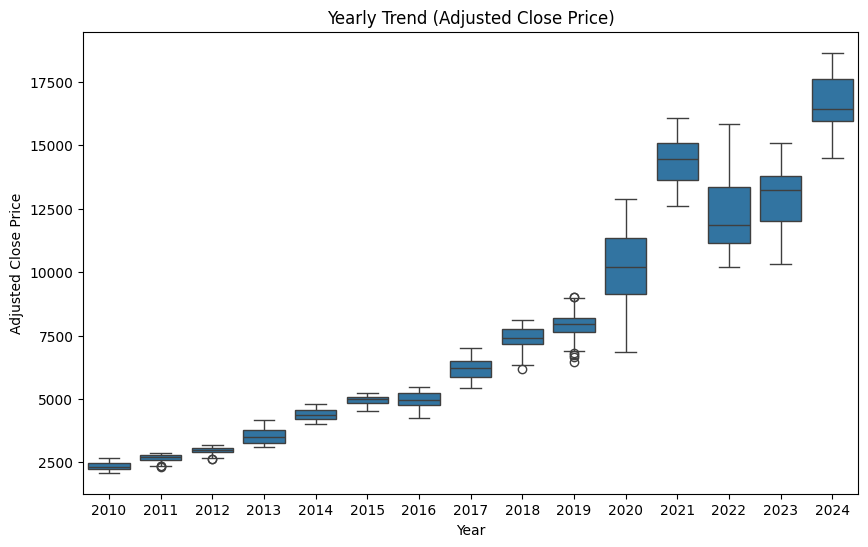

In [6]:
# Drop the 'Ticker' level from the multi-index to flatten the columns
nasdaq_data.columns = nasdaq_data.columns.get_level_values(0)

# Ensure 'Date' is in datetime format and add 'Year' column
nasdaq_data.index = pd.to_datetime(nasdaq_data.index)
nasdaq_data['Year'] = nasdaq_data.index.year

# Using a box plot to visualize yearly trends in the adjusted closing price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Adj Close', data=nasdaq_data)
plt.xlabel('Year')
plt.ylabel('Adjusted Close Price')
plt.title('Yearly Trend (Adjusted Close Price)')
plt.show()


### Yearly Trend Analysis of Adjusted Close Price

This box plot displays the yearly trend in the NASDAQ index's adjusted closing prices from 2010 to 2024. Each box represents the spread of adjusted closing prices for each year, with the median indicated by the line within the box, the interquartile range (IQR) as the box boundaries, and the whiskers extending to cover most of the data (excluding any outliers, shown as individual points).

#### Observations
- There is a clear upward trend over the years, suggesting a consistent increase in the NASDAQ index value.
- From 2016 onward, the range of prices within each year appears to widen, pointing to growing volatility.
- The most noticeable growth and fluctuations begin in 2020, likely reflecting broader economic events impacting the market.




# 3.Monthly Seasonality Analysis with Box Plot


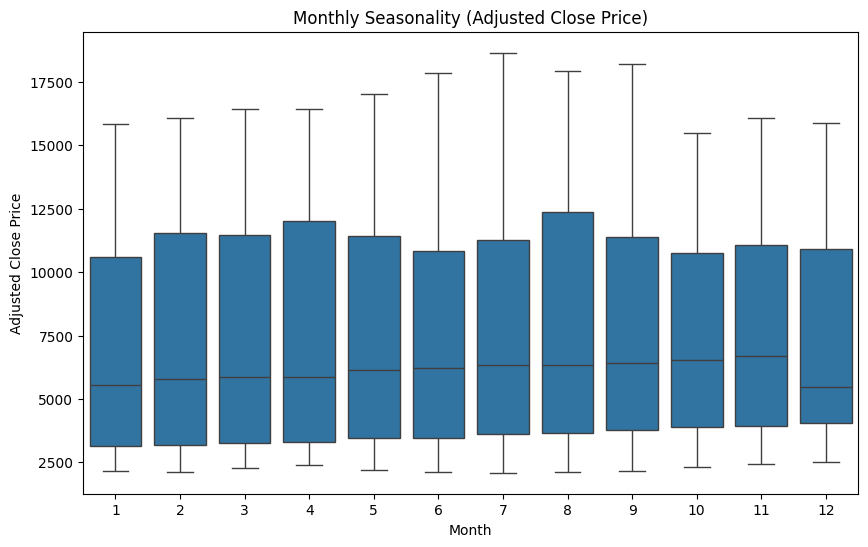

In [8]:
# Aggiunge una colonna 'Month' al DataFrame per rappresentare il mese
nasdaq_data['Month'] = nasdaq_data.index.month

# Using a box plot to analyze monthly seasonality in the adjusted closing price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Adj Close', data=nasdaq_data)
plt.xlabel('Month')
plt.ylabel('Adjusted Close Price')
plt.title('Monthly Seasonality (Adjusted Close Price)')
plt.show()


### Monthly Seasonality (Adjusted Close Price)

The box plot above represents the monthly seasonality of the adjusted closing price for the NASDAQ index. Each box corresponds to a specific month, showing the distribution of adjusted close prices throughout the years, from January (1) to December (12).

#### Observations:
- **Interquartile Range (IQR)**: The width of each box represents the interquartile range (IQR), which indicates the spread of the middle 50% of prices for that month across the dataset. The relatively wide IQR in certain months suggests a high variability in prices.
- **Median Values**: The central line within each box represents the median adjusted close price for that month. Notably, median prices remain fairly consistent across most months, indicating some stability in the adjusted close price on a month-by-month basis.
- **Outliers and Whiskers**: The whiskers and occasional outliers show the range of adjusted close prices outside the IQR. Some months, such as July and August, exhibit extended whiskers, which indicate a broader range of price fluctuations.
- **Seasonal Trends**: While no dramatic seasonal pattern is immediately apparent, there are hints of higher price ranges in the summer months, especially in July and August.

Overall, this box plot provides a quick view of monthly price distributions, offering insight into the variability and stability of the NASDAQ index's adjusted closing price over time.


# 4.Daily, Yearly, and Quarterly Averages


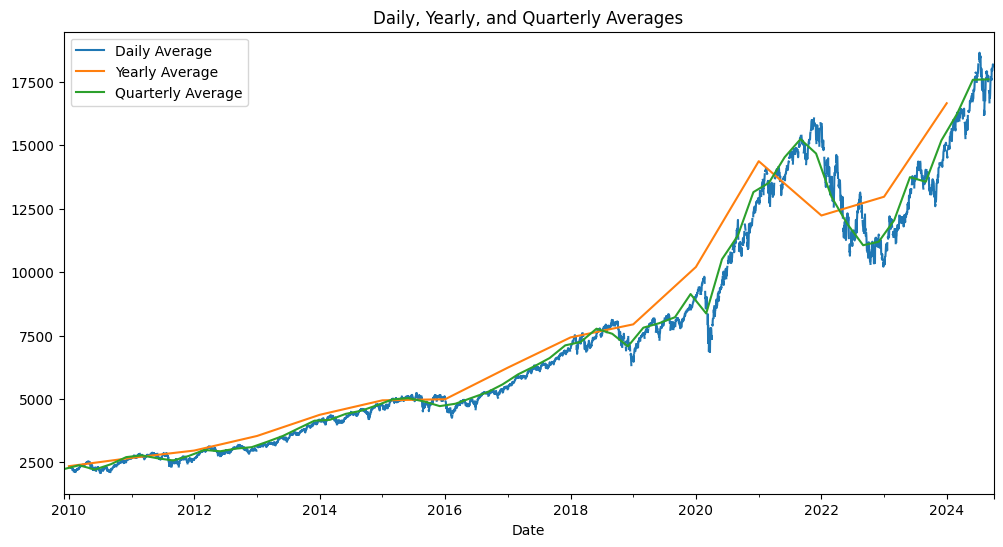

In [9]:
# Calculating daily, yearly, and quarterly averages for trend analysis
daily_avg = nasdaq_data['Adj Close'].resample('D').mean()
yearly_avg = nasdaq_data['Adj Close'].resample('YE').mean()  # Use 'YE' for end-of-year frequency
quarterly_avg = nasdaq_data['Adj Close'].resample('QE-NOV').mean()  # Use 'QE-NOV' for quarter ending in November

# Plotting the averages to observe trends over different time periods
plt.figure(figsize=(12, 6))
daily_avg.plot(label='Daily Average')
yearly_avg.plot(label='Yearly Average')
quarterly_avg.plot(label='Quarterly Average')
plt.legend()
plt.title('Daily, Yearly, and Quarterly Averages')
plt.show()


### Daily, Yearly, and Quarterly Averages

This line plot shows the daily, yearly, and quarterly average adjusted closing prices for the NASDAQ index over time, providing a visual comparison of trends at different levels of temporal aggregation.

#### Observations:
- **Daily Average**: Represented by the blue line, the daily average captures the high-frequency fluctuations in the adjusted closing prices. It shows significant short-term volatility, reflecting daily market dynamics and immediate responses to market events.
- **Yearly Average**: The orange line represents the yearly average, offering a smoothed, long-term trend. It helps in identifying overarching patterns, showing a general upward trend, particularly noticeable in the growth post-2010 and the recent rise leading up to 2024.
- **Quarterly Average**: The green line shows the quarterly average, which provides a balance between the daily and yearly perspectives. It captures seasonal trends while filtering out some of the short-term volatility seen in the daily data, highlighting periodic fluctuations without excessive noise.

This plot effectively shows the long-term upward trend of the NASDAQ index with both seasonal variations and short-term volatility. By comparing the different averages, it is clear how market behavior and trends manifest across various time frames, with long-term trends highlighted in the yearly average and more granular shifts seen in the daily and quarterly averages.


# 5.Summary Statistics


In [10]:
# Calculating key summary statistics: mean, standard deviation, median, and percentiles
mean_close = nasdaq_data['Adj Close'].mean()
std_close = nasdaq_data['Adj Close'].std()
median_close = nasdaq_data['Adj Close'].median()
percentile_10 = np.percentile(nasdaq_data['Adj Close'], 10)
percentile_90 = np.percentile(nasdaq_data['Adj Close'], 90)

# Displaying the calculated statistics
print(f"Mean: {mean_close}, Std: {std_close}")
print(f"Median: {median_close}, 10th Percentile: {percentile_10}, 90th Percentile: {percentile_90}")


Mean: 7434.796800046854, Std: 4413.8901187126685
Median: 6118.27490234375, 10th Percentile: 2686.021923828125, 90th Percentile: 14241.41259765625


### Summary Statistics Analysis

These summary statistics provide a quantitative snapshot of the NASDAQ index’s adjusted closing prices over the analyzed period.

- **Mean (7434.80)**: The average adjusted close price is around 7434.8, indicating the general price level of the NASDAQ index during this period. This average suggests moderate long-term growth, but it’s essential to compare it with other metrics for a fuller understanding of distribution and trend.
- **Standard Deviation (4413.89)**: A relatively high standard deviation suggests considerable volatility in the adjusted close prices. This reflects the index's sensitivity to market events and economic cycles, where prices have shown significant fluctuations.
- **Median (6118.27)**: The median, slightly lower than the mean, suggests a slight skew towards higher values in the data distribution, potentially influenced by recent years of significant growth


# 6.Pearson Correlation and Autocorrelation Analysis


Pearson Correlation:
 Price       pct_change  Adj Close
Price                            
pct_change    1.000000   0.015018
Adj Close     0.015018   1.000000


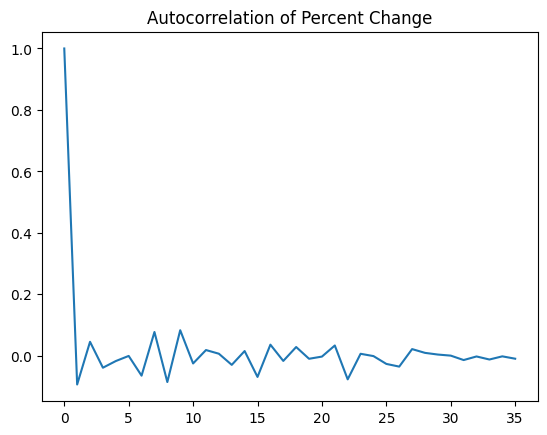

In [11]:
# Adding a column for percent change to analyze correlation and autocorrelation
nasdaq_data['pct_change'] = nasdaq_data['Adj Close'].pct_change()

# Calculating the Pearson correlation between adjusted close and percent change
corr = nasdaq_data[['pct_change', 'Adj Close']].corr(method='pearson')
print("Pearson Correlation:\n", corr)

# Plotting the autocorrelation of percent change to analyze dependencies
acf_values = acf(nasdaq_data['pct_change'].dropna())
plt.plot(acf_values)
plt.title('Autocorrelation of Percent Change')
plt.show()


### Autocorrelation of Percent Change

The autocorrelation plot of the percent change in the NASDAQ adjusted close price shows how each time period’s percent change is correlated with its own previous values. 

#### Observations:
- The initial lag (lag 0) has an autocorrelation of 1, which is expected as any value is perfectly correlated with itself.
- Beyond the initial lag, the autocorrelation quickly drops and hovers around zero, with slight fluctuations. This indicates that percent changes in the adjusted close price do not exhibit significant correlation over time, suggesting a weak dependence on prior values.
- Such a pattern aligns with the characteristics of a financial time series where price changes are often considered to follow a "random walk," meaning past values provide limited predictive power for future changes.

This weak autocorrelation reinforces the idea that recent price changes in the NASDAQ do not provide substantial information for forecasting future changes, which is typical in efficient markets.


# 7. Cointegration Test on Percent Changes


In [19]:
# Aligning 'Adj Close' and 'pct_change' to have the same length and time index
adj_close_aligned = nasdaq_data['Adj Close'].pct_change().dropna()  # Calcola 'pct_change' direttamente su 'Adj Close'
pct_change_aligned = nasdaq_data['pct_change'].dropna()

# Verifica che entrambe le serie abbiano la stessa lunghezza e indice
adj_close_aligned, pct_change_aligned = adj_close_aligned.align(pct_change_aligned, join='inner')

# Performing the cointegration test between 'Adj Close' and 'pct_change'

coint_res = coint(adj_close_aligned, pct_change_aligned)
print('Cointegration test p-value:', coint_res[1])


Cointegration test p-value: 0.0


/var/folders/8n/jpnc_m256z7gksjpzfgjfn440000gn/T/ipykernel_76568/3567798783.py:10: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_res = coint(adj_close_aligned, pct_change_aligned)


# 8.Random Walk Test using a Regression Model


In [14]:
# Adding a lagged column for 'Adj Close' to test for random walk characteristics
nasdaq_data['lagged_close'] = nasdaq_data['Adj Close'].shift(1)
nasdaq_data = nasdaq_data.dropna()

# Setting up the regression model with 'Adj Close' as the dependent variable and 'lagged_close' as the independent variable
X = nasdaq_data[['lagged_close']]
X = sm.add_constant(X)
y = nasdaq_data['Adj Close']

# Running the regression and printing the summary to analyze the results
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.340e+06
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:52:41   Log-Likelihood:                -22901.
No. Observations:                3709   AIC:                         4.581e+04
Df Residuals:                    3707   BIC:                         4.582e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2580      3.741      0.604   

### Regression Results Summary

The output shows the results of an Ordinary Least Squares (OLS) regression analysis, where the dependent variable is the adjusted closing price (`Adj Close`) of the NASDAQ, and the independent variable is a lagged version of the same adjusted close price (`lagged_close`). This regression aims to test for random walk behavior by examining if past values of `Adj Close` have predictive power over current values.

#### Key Observations

1. **Coefficient Interpretation**:
   - The coefficient for `lagged_close` is close to 1 (1.0003), indicating high persistence in the adjusted close price series. This suggests that today’s price is almost identical to the previous period’s price, which is typical for stock prices following a random walk or a highly autocorrelated structure.
   - The constant term (`const`) has a value of approximately 2.26 but a p-value of 0.546, indicating it is not statistically significant. This implies there is no substantial trend or drift in the time series over time.

2. **Statistical Significance (p-values)**:
   - The p-value for `lagged_close` is 0.00, showing that this coefficient is highly statistically significant. This suggests that past adjusted close prices significantly influence the current price, reinforcing the strong autocorrelation in the data.
   - The high F-statistic value (5.34e+06) with a p-value of 0.00 further confirms the significance of the model.

3. **R-squared and Adjusted R-squared**:
   - Both R-squared and adjusted R-squared values are 0.999, indicating that nearly all variance in the adjusted close price is explained by its previous values. This emphasizes the strong dependency of `Adj Close` on its past values, a common characteristic in financial time series.

4. **Diagnostics**:
   - **Durbin-Watson**: The Durbin-Watson statistic is approximately 2.136, suggesting no significant autocorrelation in the model’s residuals.
   - **Omnibus, Jarque-Bera (JB), Skew, Kurtosis**: The Jarque-Bera and Omnibus tests suggest non-normality in the residuals, possibly indicating heavy tails or skewness. The high kurtosis value (10.608) indicates a leptokurtic distribution, suggesting the presence of more extreme outliers than in a normal distribution.
   - **Condition Number**: A high condition number (1.69e+04) signals potential multicollinearity or numerical stability issues. This likely results from the strong correlation between price and its lagged values.

#### Conclusion

The model results reveal a strong dependency of the adjusted close price on its previous values, consistent with a random walk hypothesis. The near-perfect R-squared suggests that the series is highly autocorrelated, making it challenging to predict future values solely based on past data. Additionally, the high condition number warns of potential multicollinearity, reinforcing the idea that the series resembles a random walk with limited predictive power beyond historical values.
